# Maximizar (o minimizar) función con python

Este es el recurso adicional para el video *Cómo Maximizar una Función en python con Scipy en 2024*. Con este notebook podrás seguir las instrucciones del video y probar cambios con las funciones.

Checa las documentaciones para `scipy.optimize.minimize_scalar` y `scipy.optimize.minimize` aquí:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

## Importar librerías

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar, minimize
import matplotlib.pyplot as plt

## Maximizar función $f:\mathbb{R}\rightarrow \mathbb{R}$

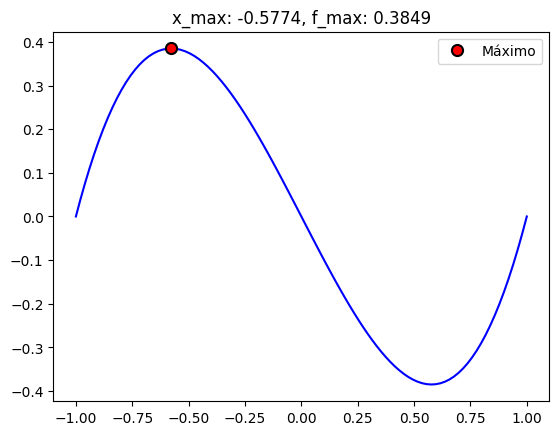

In [36]:
# Inicializar función y valores
valores = np.linspace(-1,1,100)
f = lambda x: x**3 - x

# Obtener máximo al minimizar -f(x)
resultado = minimize_scalar(
    lambda x: -f(x), # función a minimizar: -f(x)
    bounds=(-1,1) # restricciones: x en (-1,1)
)
x_max = resultado.x
f_max = resultado.fun * (-1)

# Graficar resultados
plt.plot(valores, f(valores), color="b")
plt.plot(
    x_max,f_max,"o", color="r",
    ms=8, mec="k", mew=1.5,
    label="Máximo"
)

plt.title(f"x_max: {x_max:.4f}, f_max: {f_max:.4f}")

plt.legend()
plt.show()

## Maximizar función $f:\mathbb{R}^n\rightarrow \mathbb{R}$

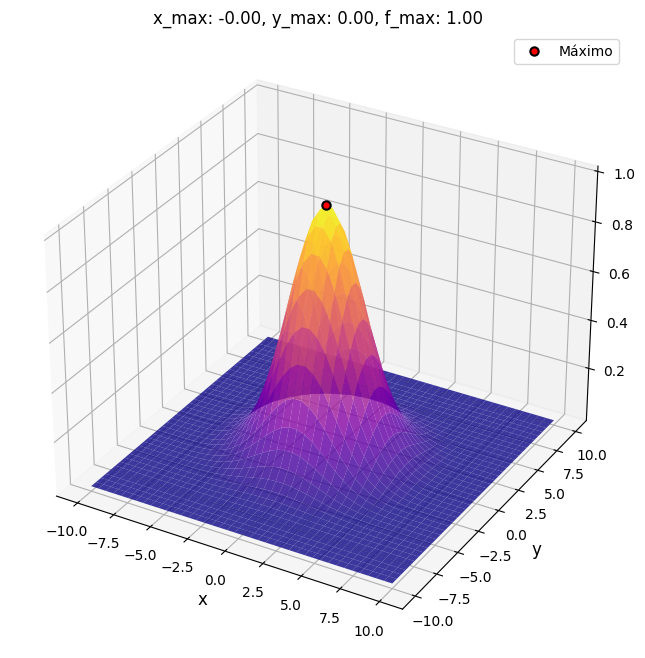

In [37]:
# Inicializar función y valores
valores_x = np.linspace(-10, 10, 40)
valores_y = np.linspace(-10, 10, 40)
f = lambda x, y: np.exp(-0.1*x**2 - 0.1*y**2)

# Obtener máximo al minimizar -f(x)
resultado = minimize(
    lambda x: -f(*x), # función a minimizar: -f(x, y)
    x0 = (-5,3),
    bounds=(
        (-10,10), # restricciones: x en (-10,10)
        (-10,10)  # restricciones: y en (-10,10)
    )
)
x_max, y_max = resultado.x
f_max = resultado.fun * (-1)

# Crear meshgrid y valores
X, Y = np.meshgrid(valores_x, valores_y)
Z = f(X,Y)

# Graficar resultados
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d', computed_zorder=False)

ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.8)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
ax.plot(
    x_max,y_max,f_max,"o",
    color="r", mec="k", mew=1.5,
    label="Máximo"
)

plt.title(f"x_max: {x_max:.2f}, y_max: {y_max:.2f}, f_max: {f_max:.2f}")
plt.legend()
plt.show()